
# **Dataset Exploration and Visualization for Object Detection with YOLO Annotations.**

Button: 999
Checkbox: 345
Image: 990
Input-Field: 1677
Radio-Button: 349
Search-Box: 91
Select-Dropdown: 721
Text: 3456
Icon: 272


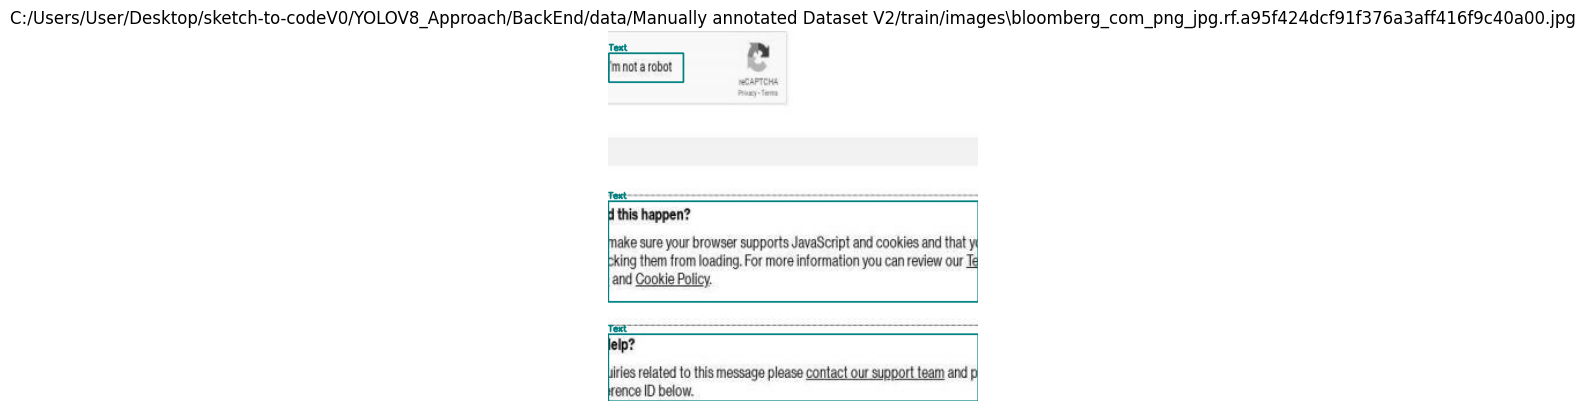

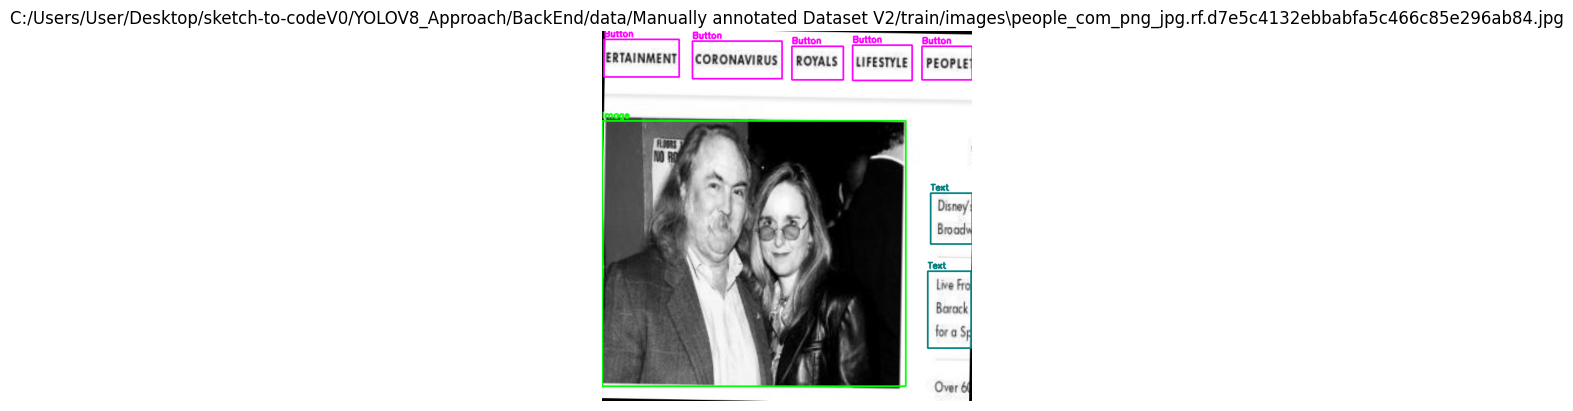

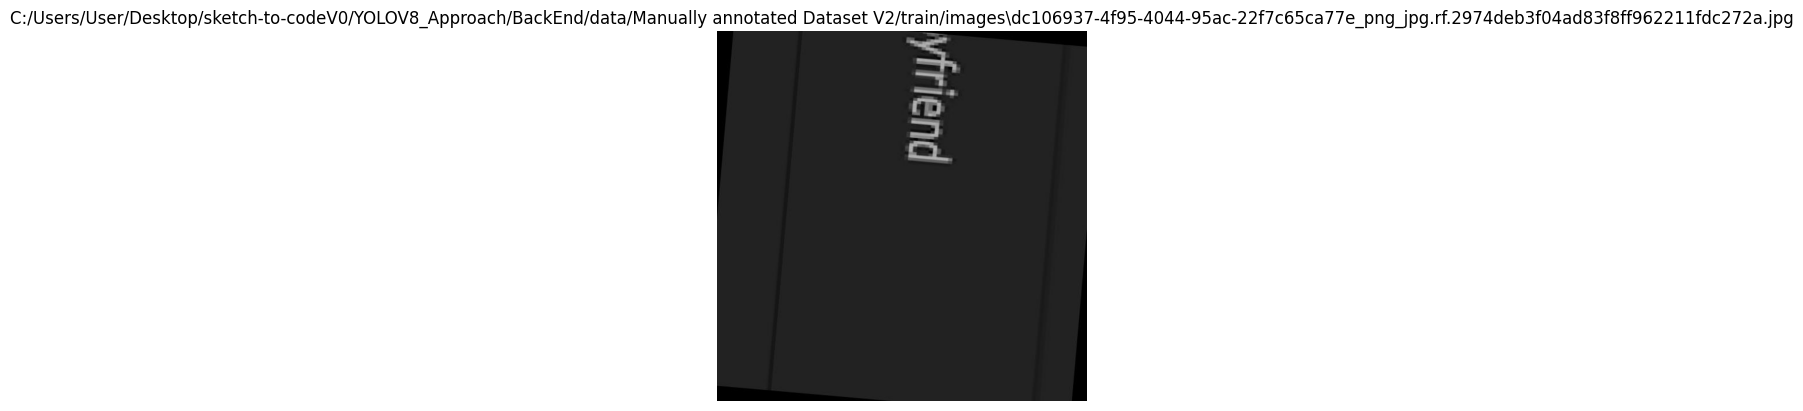

Train set:
Number of images: 1506
Number of annotations: 1506

Test set:
Number of images: 221
Number of annotations: 221

Validation set:
Number of images: 228
Number of annotations: 228

Class distribution in annotations:
{'3': 1677, '7': 3456, '0': 999, '6': 721, '2': 990, '4': 349, '1': 345, '8': 272, '5': 91}

Visualizing random samples:


In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import pandas as pd

def explore_dataset(dataset_path):
    train_images_path = os.path.join(dataset_path, "train", "images")
    train_annotations_path = os.path.join(dataset_path, "train", "labels")
    test_images_path = os.path.join(dataset_path, "test", "images")
    test_annotations_path = os.path.join(dataset_path, "test", "labels")
    valid_images_path = os.path.join(dataset_path, "valid", "images")
    valid_annotations_path = os.path.join(dataset_path, "valid", "labels")

    # Count number of images and annotations in each split
    train_image_count = len(os.listdir(train_images_path))
    train_annotation_count = len(os.listdir(train_annotations_path))
    test_image_count = len(os.listdir(test_images_path))
    test_annotation_count = len(os.listdir(test_annotations_path))
    valid_image_count = len(os.listdir(valid_images_path))
    valid_annotation_count = len(os.listdir(valid_annotations_path))

    print("Train set:")
    print(f"Number of images: {train_image_count}")
    print(f"Number of annotations: {train_annotation_count}")

    print("\nTest set:")
    print(f"Number of images: {test_image_count}")
    print(f"Number of annotations: {test_annotation_count}")

    print("\nValidation set:")
    print(f"Number of images: {valid_image_count}")
    print(f"Number of annotations: {valid_annotation_count}")

    # Check class balance in annotations
    annotations = os.listdir(train_annotations_path)
    class_counts = {}
    for annotation_file in annotations:
        with open(os.path.join(train_annotations_path, annotation_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_name = line.split()[0]
                class_counts[class_name] = class_counts.get(class_name, 0) + 1

    print("\nClass distribution in annotations:")
    print(class_counts)

    # Visualize random samples
    print("\nVisualizing random samples:")
def visualize_sample(image_path, annotation_path, class_map, color_map):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read annotations
    with open(annotation_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            class_label, x_center, y_center, width, height = line.split()
            class_name = class_map[class_label]  # Get class name from class_map
            x_center, y_center, width, height = map(float, [x_center, y_center, width, height])
            # Convert YOLO format to coordinates
            x1 = int((x_center - width / 2) * image.shape[1])
            y1 = int((y_center - height / 2) * image.shape[0])
            x2 = int((x_center + width / 2) * image.shape[1])
            y2 = int((y_center + height / 2) * image.shape[0])

            # Get color for class from color_map
            color = color_map[class_name]

            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image, class_name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Plot image
    plt.imshow(image)
    plt.title(image_path)
    plt.axis('off')
    plt.show()

def visualize_random_samples(images_path, annotations_path, class_map, color_map, num_samples):
    sample_images = random.sample(os.listdir(images_path), num_samples)
    for image_name in sample_images:
        image_path = os.path.join(images_path, image_name)
        annotation_path = os.path.join(annotations_path, image_name.replace(".jpg", ".txt"))
        visualize_sample(image_path, annotation_path, class_map, color_map)


# Define color map (class names to colors)
color_map = {
    'Button': (255, 0, 255),  # Pink color
    'Checkbox': (0, 255, 255),  # Cyan color
    'Image': (0, 255, 0),       # Green color
    'Input-Field': (255, 255, 0),  # Yellow color
    'Radio-Button': (255, 0, 0),   # Red color
    'Search-Box': (0, 0, 255),     # Blue color
    'Select-Dropdown': (128, 0, 128),  # Purple color
    'Text': (0, 128, 128),       # Teal color
    'Icon': (128, 128, 0)        # Olive color
}
class_distribution = {
    '3': 1677,
    '7': 3456,
    '0': 999,
    '6': 721,
    '2': 990,
    '4': 349,
    '1': 345,
    '8': 272,
    '5': 91
}

class_map = {
    '0': 'Button',
    '1': 'Checkbox',
    '2': 'Image',
    '3': 'Input-Field',
    '4': 'Radio-Button',
    '5': 'Search-Box',
    '6': 'Select-Dropdown',
    '7': 'Text',
    '8': 'Icon'
}

# Write class names and instances
for class_id, class_name in class_map.items():
    instances = class_distribution.get(class_id, 0)
    print(f"{class_name}: {instances}")


# Call the method with the dataset path
visualize_random_samples("C:/Users/User/Desktop/sketch-to-codeV0/YOLOV8_Approach/BackEnd/data/Manually annotated Dataset V2/train/images", "C:/Users/User/Desktop/sketch-to-codeV0/YOLOV8_Approach/BackEnd/data/Manually annotated Dataset V2/train/labels", class_map, color_map, 3)


# Call the method with the dataset path
explore_dataset("C:/Users/User/Desktop/sketch-to-codeV0/YOLOV8_Approach/BackEnd/data/Manually annotated Dataset V2")


# **Class distribution visualization**

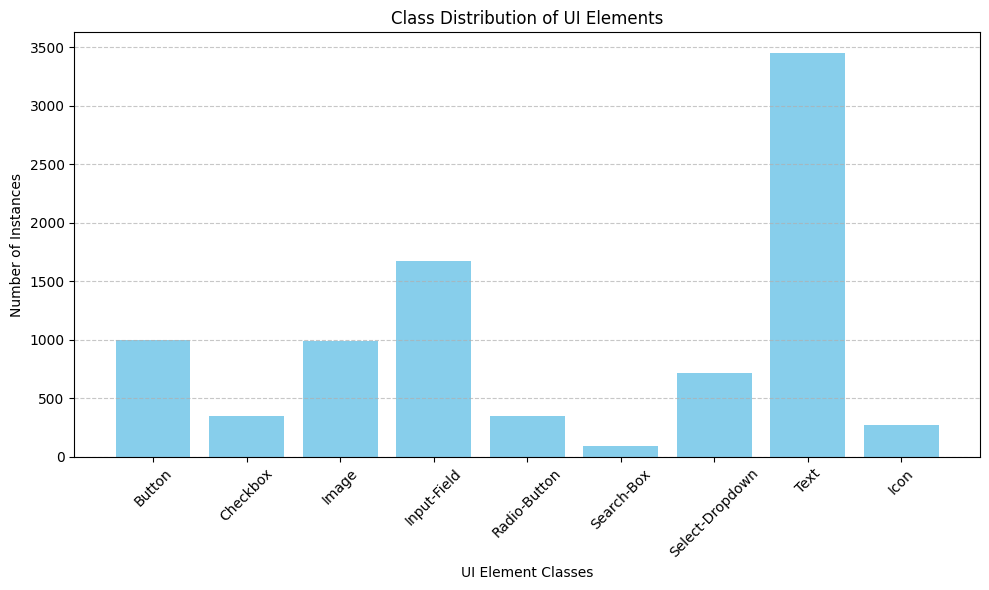

In [3]:
import matplotlib.pyplot as plt

# Class map
class_map = {
    '0': 'Button',
    '1': 'Checkbox',
    '2': 'Image',
    '3': 'Input-Field',
    '4': 'Radio-Button',
    '5': 'Search-Box',
    '6': 'Select-Dropdown',
    '7': 'Text',
    '8': 'Icon'
}

# Class distribution
# Class distribution
class_distribution = {
    'Button': 999,
    'Checkbox': 345,
    'Image': 990,
    'Input-Field': 1677,
    'Radio-Button': 349,
    'Search-Box': 91,
    'Select-Dropdown': 721,
    'Text': 3456,
    'Icon': 272
}


# Extract class names and counts
classes = list(class_distribution.keys())
counts = list(class_distribution.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('UI Element Classes')
plt.ylabel('Number of Instances')
plt.title('Class Distribution of UI Elements')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


# **Statistics**

In [4]:
import os
import cv2
import numpy as np

# Directory containing the images
images_dir = "C:/Users/User/Desktop/sketch-to-codeV0/YOLOV8_Approach/BackEnd/data/Manually annotated Dataset V2/train/images"

# Initialize variables to store statistics
pixel_values = []
image_count = 0

# Iterate through all images in the directory
for filename in os.listdir(images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image
        image_path = os.path.join(images_dir, filename)
        image = cv2.imread(image_path)

        # Convert the image to grayscale if needed
        # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Compute statistics
        pixel_values.extend(image.flatten())
        image_count += 1

# Convert the pixel values list to a numpy array for efficiency
pixel_values = np.array(pixel_values)

# Compute statistics
mean_pixel_value = np.mean(pixel_values)
std_dev_pixel_value = np.std(pixel_values)
min_pixel_value = np.min(pixel_values)
max_pixel_value = np.max(pixel_values)

# Output the statistics
print("Image Statistics:")
print("Number of Images:", image_count)
print("Mean Pixel Value:", mean_pixel_value)
print("Standard Deviation Pixel Value:", std_dev_pixel_value)
print("Minimum Pixel Value:", min_pixel_value)
print("Maximum Pixel Value:", max_pixel_value)


In [ ]:
import os
import cv2
import numpy as np

# Directory containing the images
images_dir = "C:/Users/User/Desktop/sketch-to-codeV0/YOLOV8_Approach/BackEnd/data/Manually annotated Dataset V2/test/images"

# Initialize variables to store statistics
pixel_values = []
image_count = 0

# Iterate through all images in the directory
for filename in os.listdir(images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image
        image_path = os.path.join(images_dir, filename)
        image = cv2.imread(image_path)

        # Convert the image to grayscale if needed
        # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Compute statistics
        pixel_values.extend(image.flatten())
        image_count += 1

# Convert the pixel values list to a numpy array for efficiency
pixel_values = np.array(pixel_values)

# Compute statistics
mean_pixel_value = np.mean(pixel_values)
std_dev_pixel_value = np.std(pixel_values)
min_pixel_value = np.min(pixel_values)
max_pixel_value = np.max(pixel_values)

# Output the statistics
print("Image Statistics:")
print("Number of Images:", image_count)
print("Mean Pixel Value:", mean_pixel_value)
print("Standard Deviation Pixel Value:", std_dev_pixel_value)
print("Minimum Pixel Value:", min_pixel_value)
print("Maximum Pixel Value:", max_pixel_value)


In [ ]:
import os
import cv2
import numpy as np

# Directory containing the images
images_dir = "C:/Users/User/Desktop/sketch-to-codeV0/YOLOV8_Approach/BackEnd/data/Manually annotated Dataset V2/valid/images"

# Initialize variables to store statistics
pixel_values = []
image_count = 0

# Iterate through all images in the directory
for filename in os.listdir(images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image
        image_path = os.path.join(images_dir, filename)
        image = cv2.imread(image_path)

        # Convert the image to grayscale if needed
        # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Compute statistics
        pixel_values.extend(image.flatten())
        image_count += 1

# Convert the pixel values list to a numpy array for efficiency
pixel_values = np.array(pixel_values)

# Compute statistics
mean_pixel_value = np.mean(pixel_values)
std_dev_pixel_value = np.std(pixel_values)
min_pixel_value = np.min(pixel_values)
max_pixel_value = np.max(pixel_values)

# Output the statistics
print("Image Statistics:")
print("Number of Images:", image_count)
print("Mean Pixel Value:", mean_pixel_value)
print("Standard Deviation Pixel Value:", std_dev_pixel_value)
print("Minimum Pixel Value:", min_pixel_value)
print("Maximum Pixel Value:", max_pixel_value)
